#Импорт библиотек

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib

# директория обучения
train_dir = pathlib.Path("datasets/train/")
# директория тестирования
test_dir = pathlib.Path("datasets/test/")
# директория валидации
val_dir = pathlib.Path("datasets/validation/")

#Подготовка данных для модели

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Построение модели

In [4]:
cnn = tf.keras.models.Sequential()

##Добавление слоев для обучения модели

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

c:\Users\nivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Обучение

In [6]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.0248 - loss: 19.6429 - val_accuracy: 0.0285 - val_loss: 3.5829
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.0303 - loss: 3.5814 - val_accuracy: 0.0313 - val_loss: 3.5821
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.0310 - loss: 3.5791 - val_accuracy: 0.0484 - val_loss: 3.5672
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.0377 - loss: 3.5692 - val_accuracy: 0.0541 - val_loss: 3.5293
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.0399 - loss: 3.5466 - val_accuracy: 0.0456 - val_loss: 3.5555
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.0569 - loss: 3.5305 - val_accuracy: 0.0741 - val_loss: 3.4233
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.0606 - loss: 3.4844 - val_accuracy: 0.1197 - val_loss: 3.3224
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.0838 - loss: 3.3955 - val_accuracy: 0.1567 - 

In [8]:
#Точность тренировочных данных
train_loss, train_acc = cnn.evaluate(training_set)
print('Точность на тренировочных данных:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9637 - loss: 0.1216
Точность на тренировочных данных: 0.967576265335083


In [9]:
#Точность данных валидации
val_loss, val_acc = cnn.evaluate(validation_set)
print('Точность на данных валидации:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9494 - loss: 0.2975
Точность на данных валидации: 0.94017094373703


##Сохранение модели

In [10]:
cnn.save('trained_model.h5')

#Визуализации точности

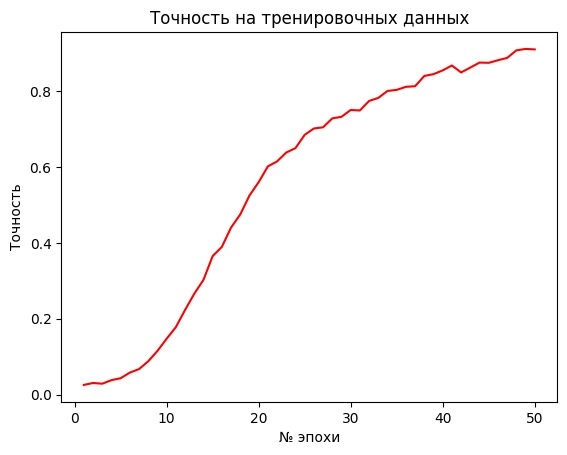

In [12]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('№ эпохи')
plt.ylabel('Точность')
plt.title('Точность на тренировочных данных')
plt.show()

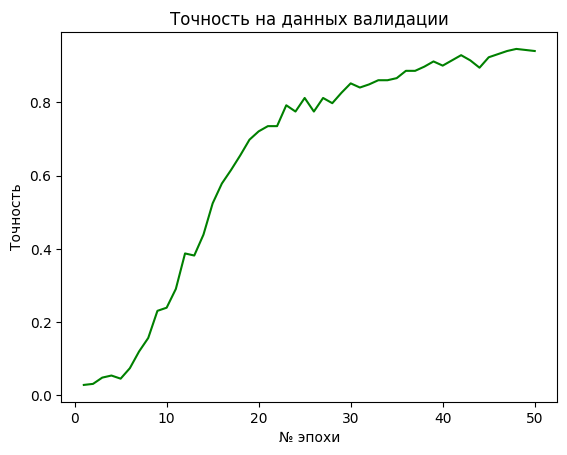

In [13]:
plt.plot(epochs,training_history.history['val_accuracy'],color='green')
plt.xlabel('№ эпохи')
plt.ylabel('Точность')
plt.title('Точность на данных валидации')
plt.show()

#Точность на тестовых данных

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Точность тестовых данных:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7155 - loss: 1.2255
Точность тестовых данных: 0.738161563873291
